In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# System of first order differential equations

def u_prime(x, y):
    return -y - y**3

def v_prime(x, y):
    return -x - x**3

In [3]:
def f(Y, y2):
    y1, y2 = Y
    return (-y2 - (y2)**3, y1 -(y1)**3)

def createPlot(IC):

    y1 = np.linspace(-3, 3, 40)
    y2 = np.linspace(-3, 3, 40)


    Y1, Y2 = np.meshgrid(y1, y2)

    t = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]

            yprime = f([x, y], y)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

# plot trajectories from an initial condition y0
    
    for y10, y20 in IC:
        tspan = np.linspace(0, 100, 400)
        y0 = [y10, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-', linewidth=0.3) # path
        plt.plot([ys[0,0]], [ys[0,1]], 'o', linewidth=0.3) # start
        plt.plot([ys[-1,0]], [ys[-1,1]], 's', linewidth=0.3) # end

    Q = plt.quiver(Y1, Y2, u, v, color='r')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.show()

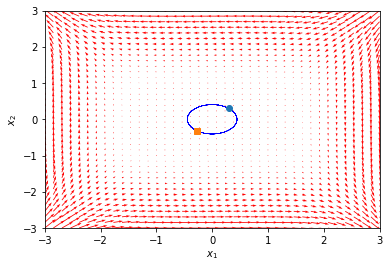

In [4]:
#Plot the phase space for different b values

IC = [(0.3, 0.3)] #Initial conditions
createPlot(IC)

From the study of the phase plane's trajectories with initial conditions ((0.5, 0.5), (-0.5, -0.5), (-0.5, 0.5), (0.5, -0.5)), we have found that the fixed point is a stable spiral for different b values.